## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

"bash" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


env: DISPLAY=:1


### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

In [4]:
import random,math

import numpy as np
from collections import defaultdict

class QLearningAgent():
  """
    Q-Learning Agent

    Instance variables you have access to
      - self.epsilon (exploration prob)
      - self.alpha (learning rate)
      - self.discount (discount rate aka gamma)

    Functions you should use
      - self.getLegalActions(state)
        which returns legal actions for a state
      - self.getQValue(state,action)
        which returns Q(state,action)
      - self.setQValue(state,action,value)
        which sets Q(state,action) := value
    
    !!!Important!!!
    NOTE: please avoid using self._qValues directly to make code cleaner
  """
  def __init__(self,alpha,epsilon,discount,getLegalActions):
    "We initialize agent and Q-values here."
    self.getLegalActions= getLegalActions
    self._qValues = defaultdict(lambda:defaultdict(lambda:0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    """
      Returns Q(state,action)
    """
    return self._qValues[state][action]

  def setQValue(self,state,action,value):
    """
      Sets the Qvalue for [state,action] to the given value
    """
    self._qValues[state][action] = value

#---------------------#start of your code#---------------------#

  def getValue(self, state):
    """
      Returns max_action Q(state,action)
      where the max is over legal actions.
    """
    
    possibleActions = self.getLegalActions(state)
    #If there are no legal actions, return 0.0
    if len(possibleActions) == 0:
    	return 0.0

    "*** YOUR CODE HERE ***"
    return max(map(lambda action: self.getQValue(state, action), possibleActions))
    
  def getPolicy(self, state):
    """
      Compute the best action to take in a state. 
      
    """
    possibleActions = self.getLegalActions(state)

    #If there are no legal actions, return None
    if len(possibleActions) == 0:
    	return None
    
    best_action = None

    "*** YOUR CODE HERE ***"
    best_action = possibleActions[np.argmax(list(map(lambda action: self.getQValue(state, action), possibleActions)))]
    return best_action

  def getAction(self, state):
    """
      Compute the action to take in the current state, including exploration.  
      
      With probability self.epsilon, we should take a random action.
      otherwise - the best policy action (self.getPolicy).

      HINT: You might want to use util.flipCoin(prob)
      HINT: To pick randomly from a list, use random.choice(list)

    """
    
    # Pick Action
    possibleActions = self.getLegalActions(state)
    action = None
    
    #If there are no legal actions, return None
    if len(possibleActions) == 0:
    	return None

    #agent parameters:
    epsilon = self.epsilon

    "*** YOUR CODE HERE ***"
    random_action = possibleActions[np.random.randint(0, len(possibleActions))]
    return random_action if np.random.uniform() < self.epsilon else self.getPolicy(state)

  def update(self, state, action, nextState, reward):
    """
      You should do your Q-Value update here

      NOTE: You should never call this function,
      it will be called on your behalf


    """
    #agent parameters
    gamma = self.discount
    learning_rate = self.alpha
    
    "*** YOUR CODE HERE ***"    
    reference_qvalue = gamma * self.getValue(nextState) + reward
    
    updated_qvalue = (1-learning_rate) * self.getQValue(state,action) + learning_rate * reference_qvalue
    self.setQValue(state,action,updated_qvalue)


#---------------------#end of your code#---------------------#

In [48]:
#from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.5,discount=0.89,
                       getLegalActions = lambda s: range(n_actions))

In [49]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

5.000000000000002e-10
8.465


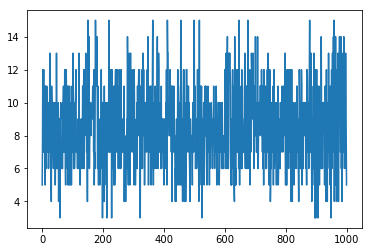

In [51]:
rewards = []
n_epochs = 10
for j in range(n_epochs):
    if agent.epsilon > 1e-9:
        agent.epsilon *= 1e-1
    agent.discount += 1e-2
    
    for i in range(5000):
        rewards.append(play_and_train(env,agent))

        if i % 1000 == 0:
            clear_output(True)
            print(agent.epsilon)
            print(np.mean(rewards))
            plt.plot(rewards)
            plt.show()
            rewards = []